In [14]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/Breast_cancer_dataset.csv")

# Quick sanity checks
print("Shape:", df.shape)
print("Columns (first 10):", list(df.columns)[:10])
print("Nulls per column (first 10):")
print(df.isna().sum().head(10))

# Look at the target column
print("\nDiagnosis distribution:")
print(df["diagnosis"].value_counts())

# Peek at data
df.head(4)

Shape: (569, 33)
Columns (first 10): ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']
Nulls per column (first 10):
id                     0
diagnosis              0
radius_mean            0
texture_mean           0
perimeter_mean         0
area_mean              0
smoothness_mean        0
compactness_mean       0
concavity_mean         0
concave points_mean    0
dtype: int64

Diagnosis distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN


In [15]:
# Drop useless columns
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

print("New shape:", df.shape)
df.head(3)

New shape: (569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [16]:
# Encode diagnosis
df["diagnosis"] = df["diagnosis"].map({"M" : 1, "B": 0})

print(df["diagnosis"].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


/var/folders/wj/bjr4zjm9615215bgymnhytnr0000gn/T/ipykernel_25845/2356204830.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "diagnosis", data = df, palette="Set2")


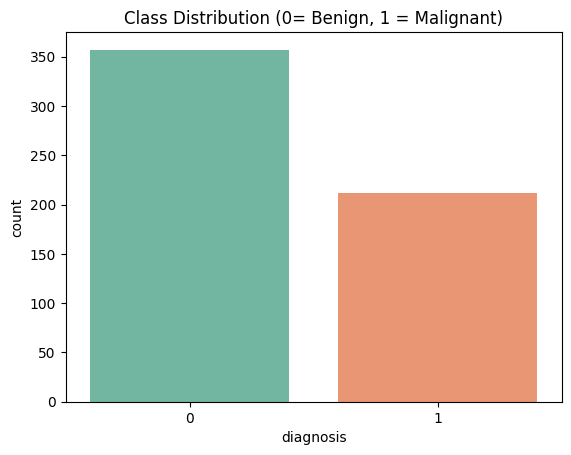

In [17]:
sns.countplot(x= "diagnosis", data = df, palette="Set2")
plt.title("Class Distribution (0= Benign, 1 = Malignant)")
plt.show()

In [18]:
df.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.00000,0.00000,0.00000,1.0000,1.0000
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
texture_mean,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
perimeter_mean,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
smoothness_mean,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.1307,0.4268
concave points_mean,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.0740,0.2012
symmetry_mean,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.1957,0.3040


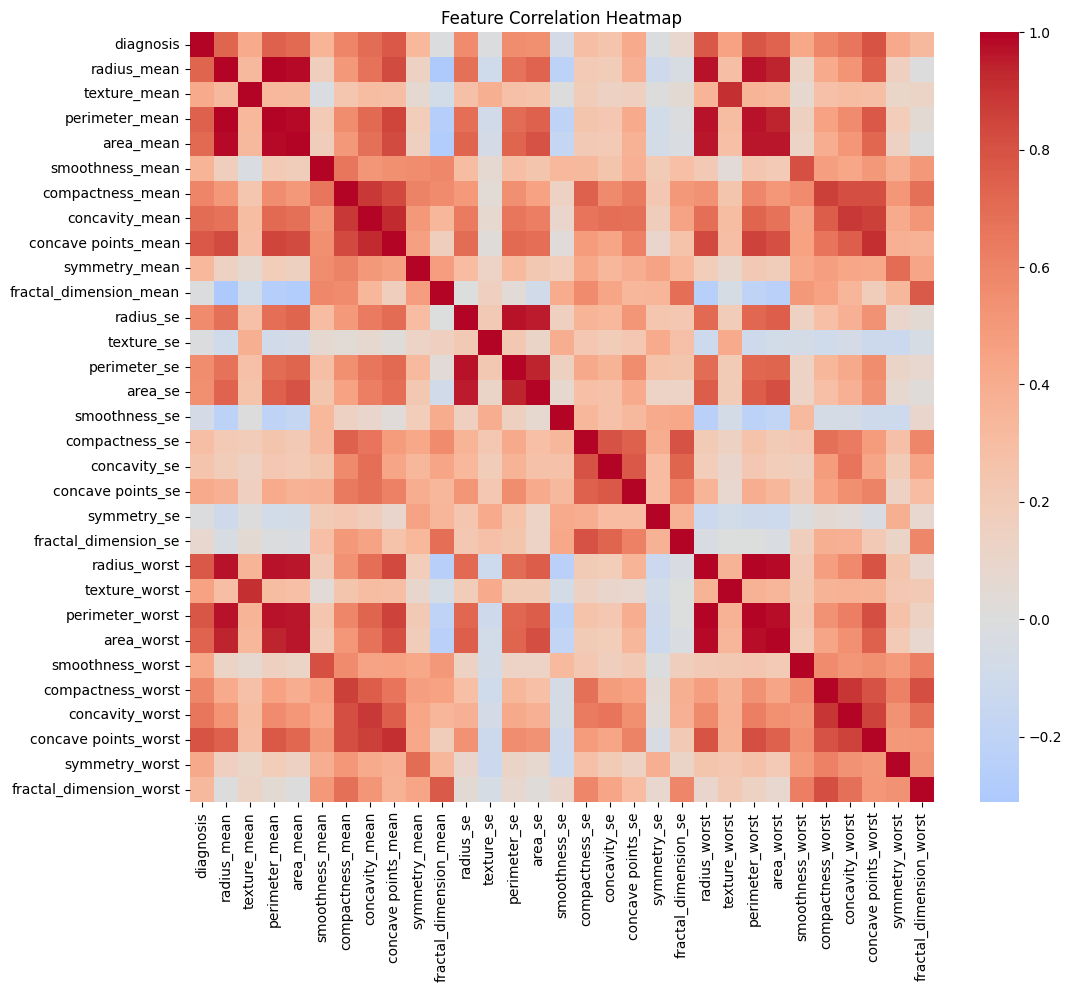

In [19]:
# Correlation heatmap/ Visual representation of correlation 
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center = 0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
# Correlation of all features with diagnosis
corr_target = df.corr()["diagnosis"].sort_values(ascending=False)
print(corr_target.head(10))   # top positive correlations
print("\n")
print(corr_target.tail(10))   # top negative correlations


diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64


smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0.008303
fractal_dimension_mean    -0.012838
smoothness_se             -0.067016
Name: diagnosis, dtype: float64


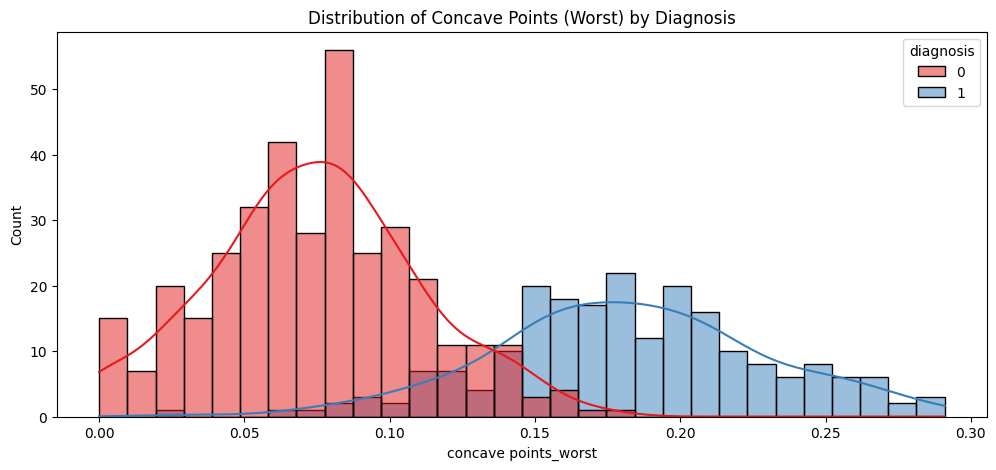

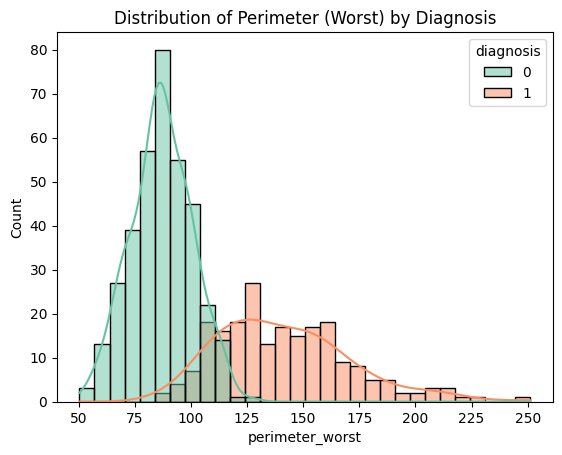

In [21]:
plt.figure(figsize=(12,5))

sns.histplot(data=df, x="concave points_worst", hue="diagnosis", bins=30, kde=True, palette="Set1")
plt.title("Distribution of Concave Points (Worst) by Diagnosis")
plt.show()

sns.histplot(data=df, x="perimeter_worst", hue="diagnosis", bins=30, kde=True, palette="Set2")
plt.title("Distribution of Perimeter (Worst) by Diagnosis")
plt.show()


In [24]:
# Splitting the data from features and the target split
X = df.drop("diagnosis", axis = 1) # Features
y = df["diagnosis"] # target

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)


Training set shape: (455, 30)
Test set shape: (114, 30)


Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



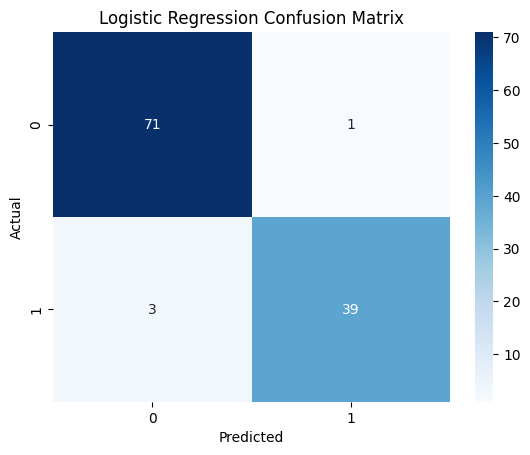

In [27]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Model
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluation 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()
